## Nenegativna matrična faktorizacija in priporočilni sistemi

Do sedaj smo obravnavali modele, ki so iz <i>več neodvisnih</i> napovedovali <i>eno</i> odvisno spremenljivko. V scenariju priporočilnega sistema smo tako za vsakega uporabnika zgradili svoj model.

Glavna motivacija metod za priporočilne sisteme je, da modeli uporabnikov med sabo <i>niso neodvisni</i>. Želimo enoten model, ki bo ovrednotil poljubno kombinacijo uporabnika in izdelka, ter implicinto izkoriščal medsebojno informacijo med različnimi modeli uporabnikov. 

Eden od modelov, ki se zelo pogosto uporabljajo v praksi je model matrične faktorizacija.
Ta predpostavlja matriko uporabnikov in izdelkov, ki ji predstavimo kot produkt dveh matrik <i>nižjega ranga</i>. Slednja lastnost omogoča stiskanje informacije in sklepanje o novih (ne-videnih, manjkajočih vrednosti) v izvirni matriki.

<img width=450 src="nmf-shema-01.png"/>

### Uvodne definicije

Matriko podatkov $\mathbf{X}$, ki vsebuje manjkajoče vrednosti, z modelom matrične faktorizacije predstavimo na naslednji način:
$$ \mathbf{X} = \mathbf{W} \mathbf{H}^T + \mathbf{E} $$,

torej kot produkt matrike $\mathbf{W}$, ki predstavlja prostor vrstic, $\mathbf{H}$ predstavlja prostor stolpcev, $\mathbf{E}$ pa ostanek oz. napako. Matriki $\mathbf{W}, \mathbf{H}$ si včasih predstavljamo kot hkratno gručenje stolpcev in vrstic. Matrike so naslednjih velikosti:
$$ \mathbf{X} \in \mathbb{R}^{m \times n}, \mathbf{W} \in \mathbb{R}^{m \times r}, \mathbf{H} \in \mathbb{R}^{n \times r},  \mathbf{E} \in \mathbb{R}^{m \times n}$$

Predostavljamo, da sta matriki $\mathbf{W}, \mathbf{H}$ <i>nizkega ranga</i>, kar v praksi pomeni da celotno informacijo iz $\mathbf{X}$ predstavljamo v stisnjeni obliki, torej
$$r < m, r < n $$.

Predpostavljamo tudi, da so matrike $\mathbf{X}$, $\mathbf{W}$ in $\mathbf{H}$ nenegativne. Tedaj govorimo o <b>nenegativni matrični faktorizaciji (NMF)</b>.
$$x_{i, j} > 0, w_{i, k} > 0, h_{j, k} > 0, \forall i, j, k $$.

Matrika napake $\mathbf{E}$ te omejitve nima (<font color="blue">razmisli</font>: zakaj?).

<br/>
### Definicija problema

Želimo torej poiskati matriki $\mathbf{W}$ in $\mathbf{H}$, tako da vrednost napake karseda nizka. To lahko zapišemo kot naslednji optimizacijski problem:

$$ \text{min}_{\mathbf{W},\mathbf{H}}\ \| \mathbf{X} - \mathbf{W}\mathbf{H}^T \|_F^2 = \text{min}_{\mathbf{W},\mathbf{H}}\ J$$

Oznaka $\| \mathbf{A} \|_F = \sqrt{\sum_{i,j} a_{i,j}^2}$ predstavlja <i>Frobeniusovo normo</i> matrike $\mathbf{A}$.  (<font color="blue">razmisli</font>: Opaziš podobnost s srednjo kvadratično napako, ki smo jo spoznali v kontekstu linearne regresije?)


Vrednost $J$ imenujemo <i>kriterijska funkcija</i>, problem iskanja minimuma pa <i>optimizacijski oz. minimizacijski problem</i>.  <b>Posebnost</b> priporičilnih sistemov je ta, da napako računamo samo na vrednostih v $\mathbf{X}$, ki so znane. Kriterijska funkcija je torej:

$$ J = \sum_{i, j | x_{i,j} \not = 0} (x_{i, j} - \sum_{l=1}^{r} w_{i,l}h_{j, l} )^2 $$

Za ta konkreten problem velja, da nima globalno optimalne rešitve za spremenljivke $\mathbf{W},\mathbf{H}$.  Vseeno ga lahko rešimo npr. z odvajanjem kriterijske funkcije in premikanjem v negativni smeri gradienta. Dobimo 
<i>pravila za posodabljanje</i> vrednosti v $\mathbf{W},\mathbf{H}$:

Vse vrednosti $w_{i,k}$ in $h_{j, k}$ popravimo tako, da vrednost v prejšnji iteraciji <i>popravimo</i> v negativni smeri gradienta, s <i>korakom</i> $\eta$:

$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} = w_{i, k}^{(t)} + \eta \sum_{j \ | \ x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(w_{i, k}^{(t)})$$

$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} = h_{j, k}^{(t)} + \eta \sum_{i \ | \  x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(h_{j, k}^{(t)})$$

<font color="green"><b>Pravila izpeljemo na tablo.</b></font>


<br/>
### Stohastični gradientni sestop

Stohastični gradientni sestop (SGD) je postopek za reševanje optimizcijskih problemov, ki niso globalno rešljivi, za vse nastopajoče spremenljivke (v našem primeru vse $w_{i,k}$ in $h_{j, k}$) pa znamo izračunati odvod glede na kriterijsko funkcijo. To smo storili v prešnjem delu.
Postopek za iskanje <i>lokalnega minimuma</i> je naslednji.

1. Naključno nastavi vrednosti vseh spremenljivk  $w_{i,k}$ in $h_{j, k}$. V našem primeru 
    velja $w_{i,k} > 0$  in $h_{j, k} > 0$.
2. V iteraciji $t = 1...T$:
    
    2.1 V naključnem vrstnem redu posodabljaj $\forall i, k, j$
$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} $$
$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} $$
            
<img width=450 src="gradient-descent-1.png"/>
Shematski prikaz gradientnega sestopa za hipotetični spremenljivki $w$, $h$ in kriterijsko funkcijo $J(w, h)$.


<font color="green"><b>Naredi sam/a.</b></font> Dopolni spodnjo implementacijo algoritma NMF, tako da uporabiš posodobitvena pravila v več iteracijah stohastičnega gradientnega sestopa. 
<br/>
<font color="blue"><b>Namig.</b></font> Pri računanju gradienta upoštevaj samo vrednosti $x_{i, j}$, ki so znane (različne od 0). Za učinkovito implementacijo izračuna vsot $\sum_{i \ | \  x_{i,j} \not = 0} $ in $\sum_{j \ | \  x_{i,j} \not = 0} $ najprej (pred začetkom iteracij):
* za vsako vrstico $i$ shranimo neničelne stolpce
* za vsak stolpec $j$ shranimo neničelne vrstice

In [2]:
import numpy as np
import itertools
import time

class NMF:
    
    """
    Fit a matrix factorization model for a matrix X with missing values.
    such that
        X = W H.T + E 
    where
        X is of shape (m, n)    - data matrix
        W is of shape (m, rank) - approximated row space
        H is of shape (n, rank) - approximated column space
        E is of shape (m, n)    - residual (error) matrix
    """
    def __init__(self, rank=10, max_iter=100, eta=0.01):

        """
        :param rank: Rank of the matrices of the model.
        :param max_iter: Maximum nuber of SGD iterations.
        :param eta: SGD learning rate.
        """
        self.rank = rank
        self.max_iter = max_iter
        self.eta = eta
    
    
    def fit(self, X, verbose = False):
        """
        Fit model parameters W, H.
        :param X: 
            Non-negative data matrix of shape (m, n)
            Unknown values are assumed to take the value of zero (0).
        """
        m, n = X.shape

        W = np.random.rand(m, self.rank)
        H = np.random.rand(n, self.rank)
 
        # Indices to model variables
        w_vars = list(itertools.product(range(m), range(self.rank)))
        h_vars = list(itertools.product(range(n), range(self.rank)))

        # Indices to nonzero rows/columns
        nzcols = dict([(j, X[:, j].nonzero()[0]) for j in range(n)])
        nzrows = dict([(i, X[i, :].nonzero()[0]) for i in range(m)])

        # Errors
        self.error = np.zeros((self.max_iter,))

        for t in range(self.max_iter):
            t1 = time.time()
            np.random.shuffle(w_vars)
            np.random.shuffle(h_vars)

            for i, k in w_vars:
                wgrad   = sum([(X[i, j] - W[i, :].dot(H[j, :]))*W[i, k] for j in nzrows[i]])
                W[i, k] = max(0, W[i, k] + self.eta * wgrad)

            for j, k in h_vars:
                hgrad   = sum([(X[i, j] - W[i, :].dot(H[j, :]))*H[j, k] for i in nzcols[j]])
                H[j, k] = max(0, H[j, k] + self.eta * hgrad)
            
            self.error[t] = sum([sum([(X[i, j] - W[i, :].dot(H[j, :]))**2 for j in nzrows[i]]) 
                                for i in range(X.shape[0])])

            if verbose:
                print(t, self.error[t])
       
        self.W = W
        self.H = H
    
    
    def predict(self, i, j):
        """
        Predict score for row i and column j
        :param i: Row index.
        :param j: Column index.
        """
        return self.W[i, :].dot(self.H[:, j])
    

    def predict_all(self):
        """
        Return approximated matrix for all
        columns and rows.
        """
        return self.W.dot(self.H.T)

Testirajmo metodo na matriki naključnih podatkov.

In [3]:
m = 100       # St. vrstic
n = 80        # St. stolpcev
rank = 5      # Rang model
error = 0.1   # Nakljucni šum
A = np.random.rand(m, rank*2)  
B = np.random.rand(n, rank*2)
X = A.dot(B.T) + error * np.random.rand(m, n)  # generiramo podatke

Poženemo iskanje parametrov $\mathbf{W}$, $\mathbf{H}$.

In [5]:
model = NMF(rank=rank, max_iter=20, eta=0.001)
model.fit(X)

Napaka modela pada s številom iteracij.

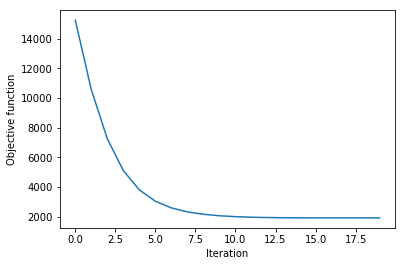

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model.error)
plt.xlabel("Iteration")
plt.ylabel("Objective function")

Primerjajmo model in izvirne podatke.

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolor(X)
ax[0].set_title("Original")

ax[1].pcolor(model.predict_all())
ax[1].set_title("Model")
plt.show()

Izračunamo pojasnjeno varianco.

In [1]:
Xp = model.predict_all()
expl_var = (np.var(X) - np.var(X-Xp))/np.var(X)
expl_var

NameError: name 'model' is not defined

<font color="green"><b>Naredi sam/a.</b></font> Kako se pojasnjena varianca spreminja z rangom modela, št. iteracij?

In [9]:
for rank in range(3,7): ###rank povečujemo
    model = NMF(rank=rank, max_iter=20, eta=0.001)
    model.fit(X)

    Xp = model.predict_all()
    expl_var = (np.var(X) - np.var(X-Xp))/np.var(X)
    print(rank, expl_var)

3 0.187299693284


4 0.327841134178


5 0.442006484819


6 0.563454999532


In [20]:
def load_jester(p=0.05):
    """
    :param p: Probability of rating appearing in the training set.
    :return
        X training grades (retining with probability p)
        Y test grades (whole dataset) 
    """

    Y = np.genfromtxt("jester-data.csv", delimiter=",", dtype=float, )
    Y = Y[:, 1:]
    Y[Y == 99] = 0 
    Y[Y != 0]  = Y[Y!=0] + abs(Y[Y!=0].min())

    # Separate data in test/train with probability p
    M = np.random.rand(*Y.shape) 
    M_tr = M < p
    M_te = M > p
    X = Y * M_tr
    Y = Y * M_te

    return X, Y

<font color="green"><b>Naredi sam/a.</b></font> Preizkusi metodo NMF na podatkovni zbirki Jester. Podatki so razdeljeni na učno in testno množico, kjer je v učni množici prisoten delež $p$ ocen. Poženi model na učni množici in izračunaj testno napako (RMSE, pojasnjeno varianco) na ocenah, ki niso bile uporabljene za učenje. Izračunaj, kako se testna napaka spreminja v odvisnosti od:
* delež učnih ocen $p$,
* ranga matrik modela (število $r$, parameter ```rank```)

In [22]:
# Naložimo podatkovno zbirko Jester z 1% upoštevanih ocen
from jester import load_jester
from sklearn.metrics import mean_squared_error

# X: 1% podatkov, Y ostalih 99%------ 1 procent je premalo... zato so notri same nule... dal sem iz 0.01 na ... 
X, Y = load_jester(p=0.10)
X.shape

model = NMF(rank=5, max_iter=10)
model.fit(X, True)
Yp = model.predict_all()
expl_var = (np.var(Y) - np.var(Y-Yp))/np.var(Y)
mse = mean_squared_error(Yp, Y)
print(expl_var, mse)

OSError: jester-data.csv not found.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolor(Y)
ax[0].set_title("Original")

ax[1].pcolor(Yp)
ax[1].set_title("Model")
plt.show()